# Importing necessary libraries

In [1]:
from qiskit import QuantumRegister, QuantumCircuit

## Initializing the quantum circuit

In [2]:
qr = QuantumRegister(2)

In [3]:
circuit = QuantumCircuit(qr)

## How to visualize the circuit?

We can use different methods depending on our requirements. A quick print statement is a quick-and-dirty solution. Then $\texttt{matploblib}$ and even $\texttt{latex}$ figures give you high quality outputs worthy of even scientific journals!

In [4]:
print(circuit)

      
q0_0: 
      
q0_1: 
      


In [5]:
circuit.draw()

q0_0: 
      
q0_1:

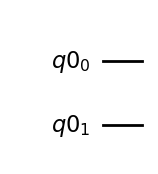

In [6]:
circuit.draw(output='mpl')

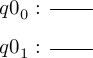

In [7]:
circuit.draw(output='latex')

Let's add some actual gates to the circuit

In [8]:
circuit.h(0)
circuit.cx(0, 1)

# circuit.barrier() # useful for visualizing the circuit as "blocks". Might change the transpilation, though!

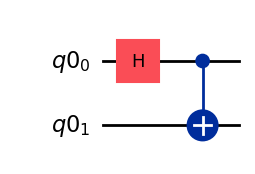

In [9]:
circuit.draw(output='mpl')

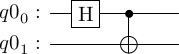

In [10]:
circuit.draw(output='latex')

Let's now perform a measurement of a subset of the qubits.

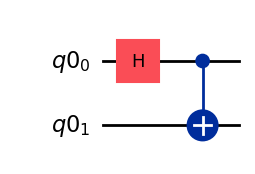

In [11]:
circuit.draw(output='mpl')

Now we can perform gates conditioned on the measurement outcomes!

Finally, let's measure the entire circuit and look at the statistics!

In [12]:
circuit.measure_all()

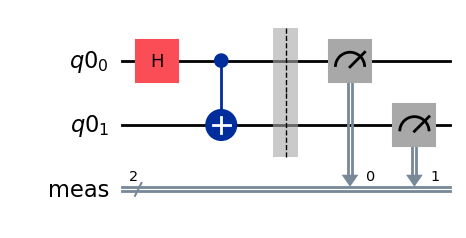

In [13]:
circuit.draw(output='mpl')

We need to simulate the circuit in order to see how it works.

In [14]:
from qiskit_aer import AerSimulator
from qiskit_aer import Aer
aer_sim = AerSimulator()

for backend in Aer.backends():
    print(backend)

AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


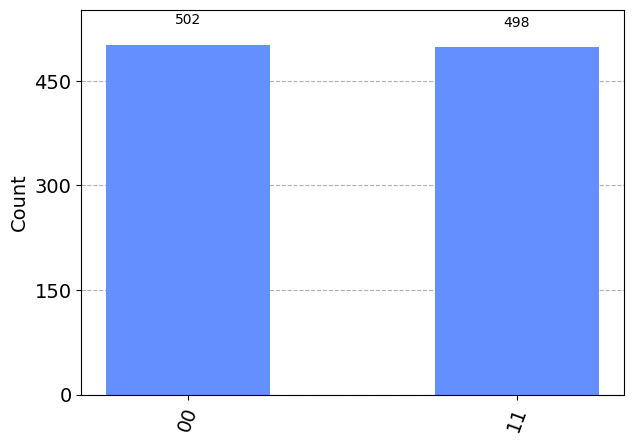

In [15]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')

job = backend.run(circuit, shots=1000)

result = job.result()

counts = result.get_counts(circuit)
plot_histogram(counts)

We can also perform tomography using qiskit!

In [16]:
backend = Aer.get_backend('aer_simulator')

In [17]:
from qiskit_experiments.library import StateTomography

In [18]:
# QST Experiment
qstexp1 = StateTomography(circuit)
qstdata1 = qstexp1.run(backend, seed_simulation=100).block_for_results()

# Print results
for result in qstdata1.analysis_results():
    print(result)

AnalysisResult
- name: state
- value: DensityMatrix([[ 4.84556532e-01+0.j        ,  6.53796373e-03-0.00233336j,
                -2.56029899e-04+0.00682143j,  9.76787905e-04+0.00829412j],
               [ 6.53796373e-03+0.00233336j,  5.01518862e-03+0.j        ,
                -2.39816499e-03-0.00176936j, -3.01139775e-03-0.01719381j],
               [-2.56029899e-04-0.00682143j, -2.39816499e-03+0.00176936j,
                 2.42758808e-03+0.j        , -4.76412925e-03-0.00016506j],
               [ 9.76787905e-04-0.00829412j, -3.01139775e-03+0.01719381j,
                -4.76412925e-03+0.00016506j,  5.08000691e-01+0.j        ]],
              dims=(2, 2))
- quality: unknown
- extra: <9 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: positive
- value: True
- quality: unknown
- extra: <9 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [19]:
state_result = qstdata1.analysis_results("state")
print(state_result.value)

DensityMatrix([[ 4.84556532e-01+0.j        ,  6.53796373e-03-0.00233336j,
                -2.56029899e-04+0.00682143j,  9.76787905e-04+0.00829412j],
               [ 6.53796373e-03+0.00233336j,  5.01518862e-03+0.j        ,
                -2.39816499e-03-0.00176936j, -3.01139775e-03-0.01719381j],
               [-2.56029899e-04-0.00682143j, -2.39816499e-03+0.00176936j,
                 2.42758808e-03+0.j        , -4.76412925e-03-0.00016506j],
               [ 9.76787905e-04-0.00829412j, -3.01139775e-03+0.01719381j,
                -4.76412925e-03+0.00016506j,  5.08000691e-01+0.j        ]],
              dims=(2, 2))


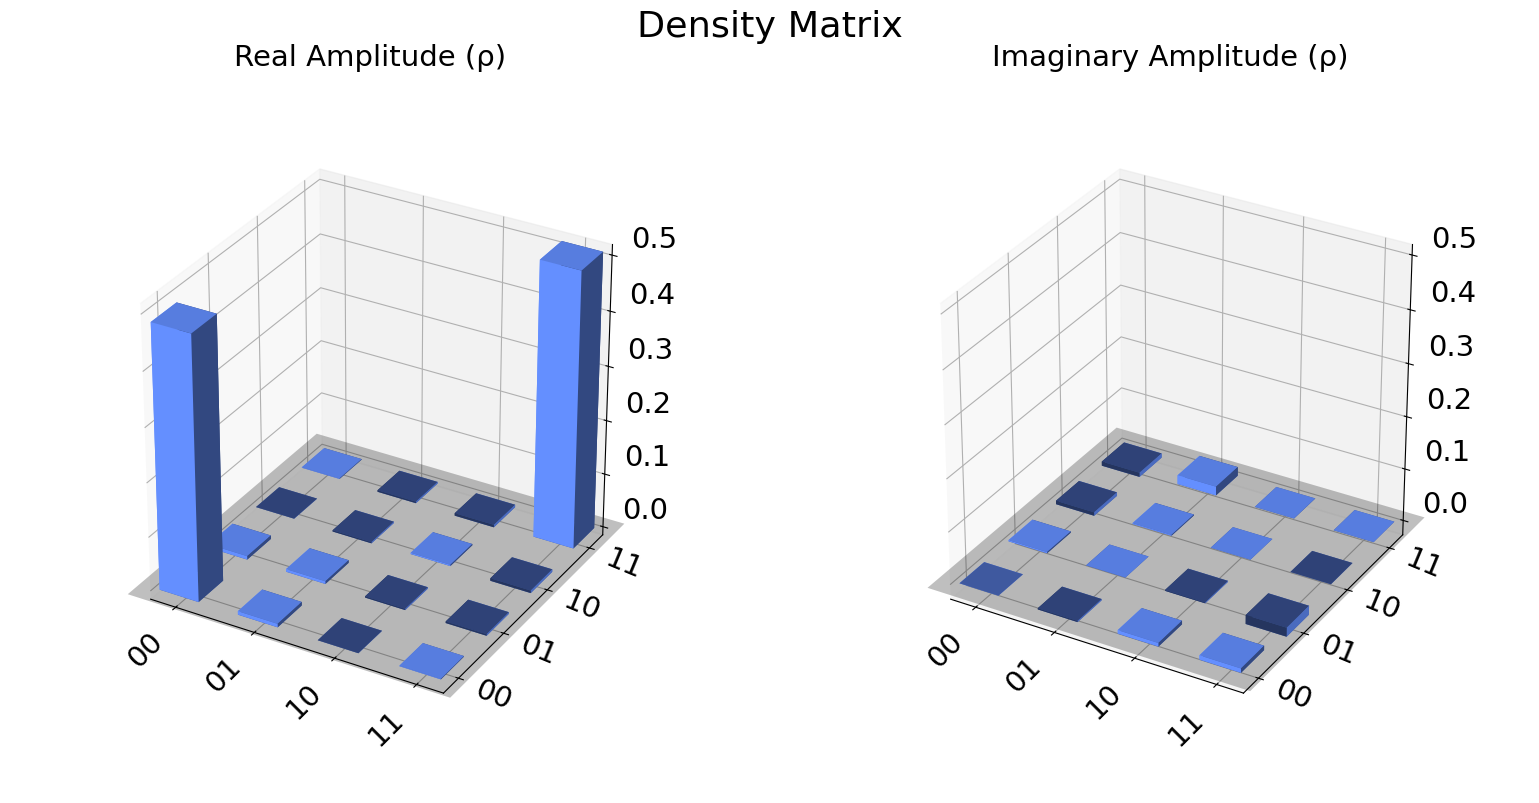

In [20]:
from qiskit.visualization import plot_state_city
plot_state_city(qstdata1.analysis_results("state").value, title='Density Matrix')